# Population static time-series released by World Food Programme (WFP)

In this notebook, we create *static time-series* regarding the population for the administrative regions of the following countries:

- Yemen
- Nigeria
- Burkina Faso
- Syria

With the term *static*, we mean time-series that not change over time. We select a certain starting year as reference to create our time-series until another reference year.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ntpath
import glob
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from TsIP.TsIP import TsIP
from MapPlot.MapPlot import choropleth

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Load the data released by wfp.
print("The data released by wfp:")
df = pd.read_csv("./wfp_data/populations.csv")
df.head()

The data released by wfp:


,adm0_name,adm0_code,adm1_name,adm1_code,population
0,Burkina Faso,42,BOUCLE-DU-MOUHOUN,900712.0,1816310
1,Burkina Faso,42,CASCADES,900713.0,755896
2,Burkina Faso,42,CENTRE,900714.0,2623394
3,Burkina Faso,42,CENTRE-EST,900715.0,2623394
4,Burkina Faso,42,CENTRE-NORD,900716.0,1551284


In [5]:
# Change the name of adminstrata feature.
df.rename(columns = {"adm0_name": "Country", "adm1_name": "AdminStrata", "population": "Population"}, inplace = True)
# Delete geometry feature.
df.drop(columns = ["adm0_code", "adm1_code"], inplace = True)
df.head()

,Country,AdminStrata,Population
0,Burkina Faso,BOUCLE-DU-MOUHOUN,1816310
1,Burkina Faso,CASCADES,755896
2,Burkina Faso,CENTRE,2623394
3,Burkina Faso,CENTRE-EST,2623394
4,Burkina Faso,CENTRE-NORD,1551284


In [6]:
# The strings of AdminStrata key for Burkina Faso country are uppercase, I change them to obtain lowercase with first capital letter.
def to_lower(country, admin):
    if country == "Burkina Faso":
        admin = admin.lower().title()      
    return admin
    
df["AdminStrata"] = df[["Country", "AdminStrata"]].apply(lambda x: to_lower(*x), axis = 1)

## Creation of the time-series

In [7]:
# Create multi-index columns dataframe.
df = df.set_index(["Country", "AdminStrata"]).unstack([0, 1]).unstack([1, 2]).reset_index(drop = True)
df.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple(list(x) + ["Population"]), df.columns)), names = ["Country", "AdminStrata", "Indicator"])
df

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Population Population Population Population  Population   
0                     1816310     755896    2623394    2623394     1551284   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Population Population Population    Population Population  ...   
0                1510412     801374    1633891       1983881    1500082  ...   

Country          Yemen                                                         \
AdminStrata      Marib     Raymah     Sa'ada     Sana'a    Shabwah    Socotra   
Indicator   Population Population Population Population Population Population   
0               495634     646854     981401    1469960     665881      68247   

Country                   Nigeria                        
AdminStrata      Taizz    Adamawa      Borno       Yobe  
Indicator   Population Population Population Population  
0              3065034    4946724    5884116    4340967  

[1 rows x 52 columns]

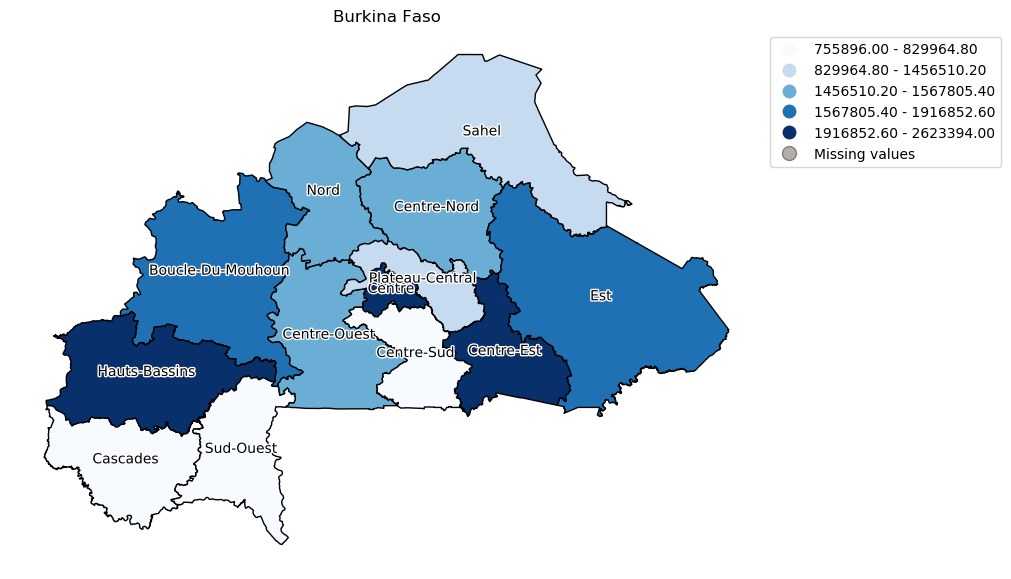

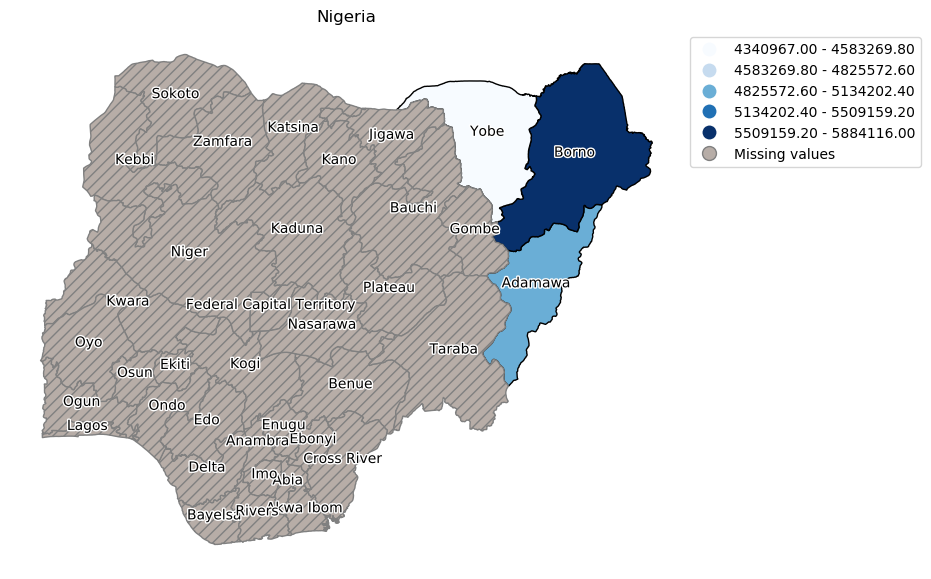

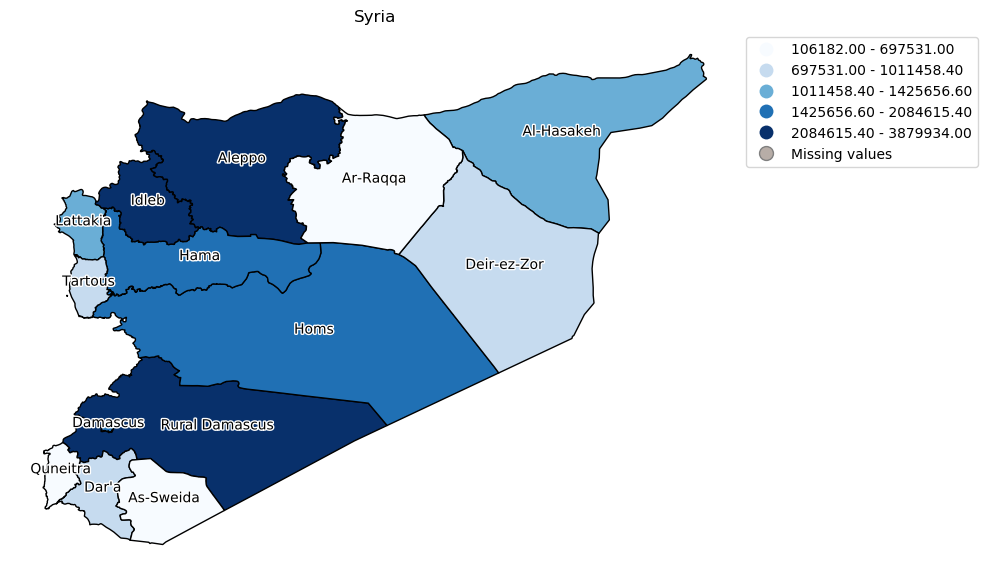

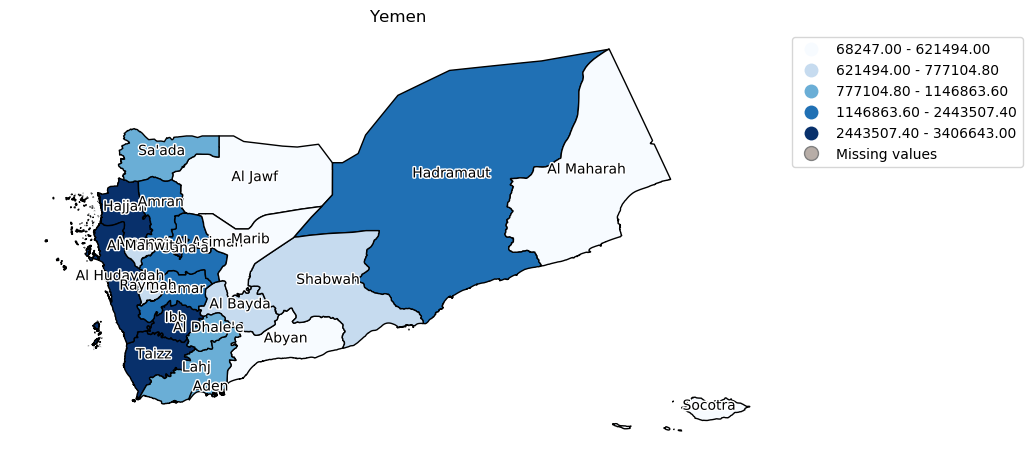

In [8]:
# Plot a choropleth map of the populations.
for country in df.columns.levels[0]:
    # Define pandas serie quantiles.
    quantiles = df[country].droplevel(level = 1, axis = 1).loc[0]
    # Plot map.
    choropleth(country, quantiles, "../Shape Files/shapefiles/" + country + "/administrative level 1", figsize = (10, 7), cmap = "Blues", annotation = True)

In [9]:
# Define two years between which we decide to build the time-series.
FIRST_YEAR = "2018"
LAST_YEAR = "2021"

In [10]:
# Create static time-series of the population.
new_index = pd.date_range(FIRST_YEAR, LAST_YEAR, freq = "D")
df = df.loc[df.index.repeat(len(new_index))]
df.index = new_index
df.index.name = "Datetime"
df

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Population Population Population Population  Population   
Datetime                                                                     
2018-01-01            1816310     755896    2623394    2623394     1551284   
2018-01-02            1816310     755896    2623394    2623394     1551284   
2018-01-03            1816310     755896    2623394    2623394     1551284   
2018-01-04            1816310     755896    2623394    2623394     1551284   
2018-01-05            1816310     755896    2623394    2623394     1551284   
...                       ...        ...        ...        ...         ...   
2020-12-28            1816310     755896    2623394    2623394     1551284   
2020-12-29            1816310     755896    2623394    2623394     1551284   
2020-12-30            1816310     755896    2623394    2623394     1551284   
2020-12-31            1816310     755896    2623394    2623394     1551284   
2021-01-01            1816310     755896    2623394    2623394     1551284   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Population Population Population    Population Population  ...   
Datetime                                                                 ...   
2018-01-01       1510412     801374    1633891       1983881    1500082  ...   
2018-01-02       1510412     801374    1633891       1983881    1500082  ...   
2018-01-03       1510412     801374    1633891       1983881    1500082  ...   
2018-01-04       1510412     801374    1633891       1983881    1500082  ...   
2018-01-05       1510412     801374    1633891       1983881    1500082  ...   
...                  ...        ...        ...           ...        ...  ...   
2020-12-28       1510412     801374    1633891       1983881    1500082  ...   
2020-12-29       1510412     801374    1633891       1983881    1500082  ...   
2020-12-30       1510412     801374    1633891       1983881    1500082  ...   
2020-12-31       1510412     801374    1633891       1983881    1500082  ...   
2021-01-01       1510412     801374    1633891       1983881    1500082  ...   

Country          Yemen                                                         \
AdminStrata      Marib     Raymah     Sa'ada     Sana'a    Shabwah    Socotra   
Indicator   Population Population Population Population Population Population   
Datetime                                                                        
2018-01-01      495634     646854     981401    1469960     665881      68247   
2018-01-02      495634     646854     981401    1469960     665881      68247   
2018-01-03      495634     646854     981401    1469960     665881      68247   
2018-01-04      495634     646854     981401    1469960     665881      68247   
2018-01-05      495634     646854     981401    1469960     665881      68247   
...                ...        ...        ...        ...        ...        ...   
2020-12-28      495634     646854     981401    1469960     665881      68247   
2020-12-29      495634     646854     981401    1469960     665881      68247   
2020-12-30      495634     646854     981401    1469960     665881      68247   
2020-12-31      495634     646854     981401    1469960     665881      68247   
2021-01-01      495634     646854     981401    1469960     665881      68247   

Country                   Nigeria                        
AdminStrata      Taizz    Adamawa      Borno       Yobe  
Indicator   Population Population Population Population  
Datetime                                                 
2018-01-01     3065034    4946724    5884116    4340967  
2018-01-02     3065034    4946724    5884116    4340967  
2018-01-03     3065034    4946724    5884116    4340967  
2018-0

In [11]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [12]:
# Save the static time-series.
df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_population"));

In [13]:
# Plot static time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Population")

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Syria', 'Yemen', 'Nigeria…